<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

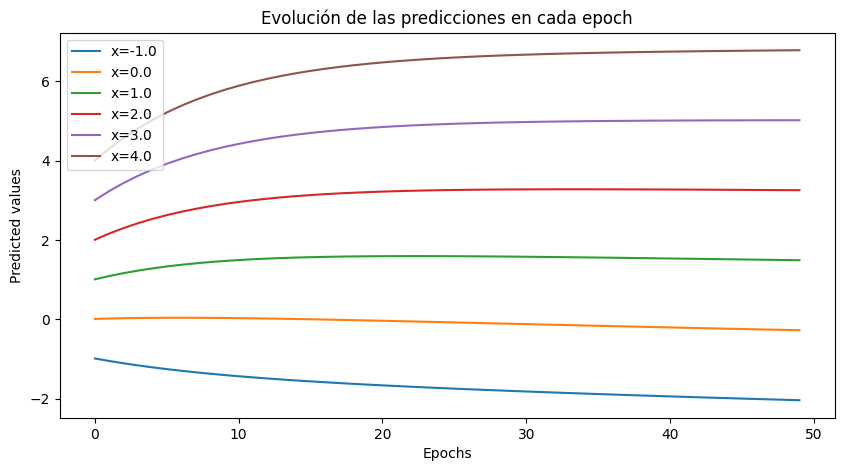

In [3]:
# ¿Para qué se usa tf.keras.callbacks.Callback?
# Una callback en TensorFlow es un mecanismo que permite ejecutar código en ciertos puntos del entrenamiento, sin necesidad de detener
# el proceso. En este caso, myCallback está guardando las predicciones de cada epoch mientras el modelo entrena.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada y salida
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Definir el modelo de regresión lineal
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

# Lista para almacenar las predicciones en cada epoch
predictions = []

# Callback personalizada
# En Python, cuando definimos métodos dentro de una clase, el primer parámetro siempre es self, que representa la instancia de la clase.
# Esto significa que cuando on_epoch_end() se ejecuta, puede acceder a los atributos y métodos de la propia clase myCallback.
# logs en on_epoch_end(self, epoch, logs={}) es un diccionario que almacena datos del entrenamiento en cada epoch.
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        pred = model.predict(xs)
        predictions.append(pred.flatten())  # Guardamos las predicciones

callbacks = myCallback()

# Entrenar el modelo con la callback activada
model.fit(xs, ys, epochs=50, callbacks=[callbacks], verbose=0)

# 🔹 Graficar la evolución de las predicciones
plt.figure(figsize=(10, 5))
for i in range(len(xs)):
    plt.plot(range(50), [p[i] for p in predictions], label=f'x={xs[i]}')

plt.xlabel('Epochs')
plt.ylabel('Predicted values')
plt.title('Evolución de las predicciones en cada epoch')
plt.legend()
plt.show()
